In [1]:
!wget https://files.grouplens.org/datasets/movielens/ml-25m.zip
!unzip ml-25m.zip

--2025-02-26 16:04:09--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  10.0MB/s    in 28s     

2025-02-26 16:04:38 (9.03 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]

Archive:  ml-25m.zip
   creating: ml-25m/
  inflating: ml-25m/tags.csv         
  inflating: ml-25m/links.csv        
  inflating: ml-25m/README.txt       
  inflating: ml-25m/ratings.csv      
  inflating: ml-25m/genome-tags.csv  
  inflating: ml-25m/genome-scores.csv  
  inflating: ml-25m/movies.csv       


In [2]:
import pandas as pd

ratings = pd.read_csv("ml-25m/ratings.csv")
movies = pd.read_csv("ml-25m/movies.csv")
tags = pd.read_csv("ml-25m/tags.csv")

print(ratings.head())
print(movies.head())


   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
import networkx as nx
import pandas as pd

ratings = pd.read_csv("ml-25m/ratings.csv")
movies = pd.read_csv("ml-25m/movies.csv")

G = nx.Graph()

user_ids = ratings['userId'].unique()
G.add_nodes_from(user_ids, bipartite=0)

movie_ids = movies['movieId'].unique()
G.add_nodes_from(movie_ids, bipartite=1)

edges = list(zip(ratings['userId'], ratings['movieId'], ratings['rating']))
G.add_weighted_edges_from(edges)

print("Graph Summary:", G)



Graph Summary: Graph with 183136 nodes and 24989080 edges


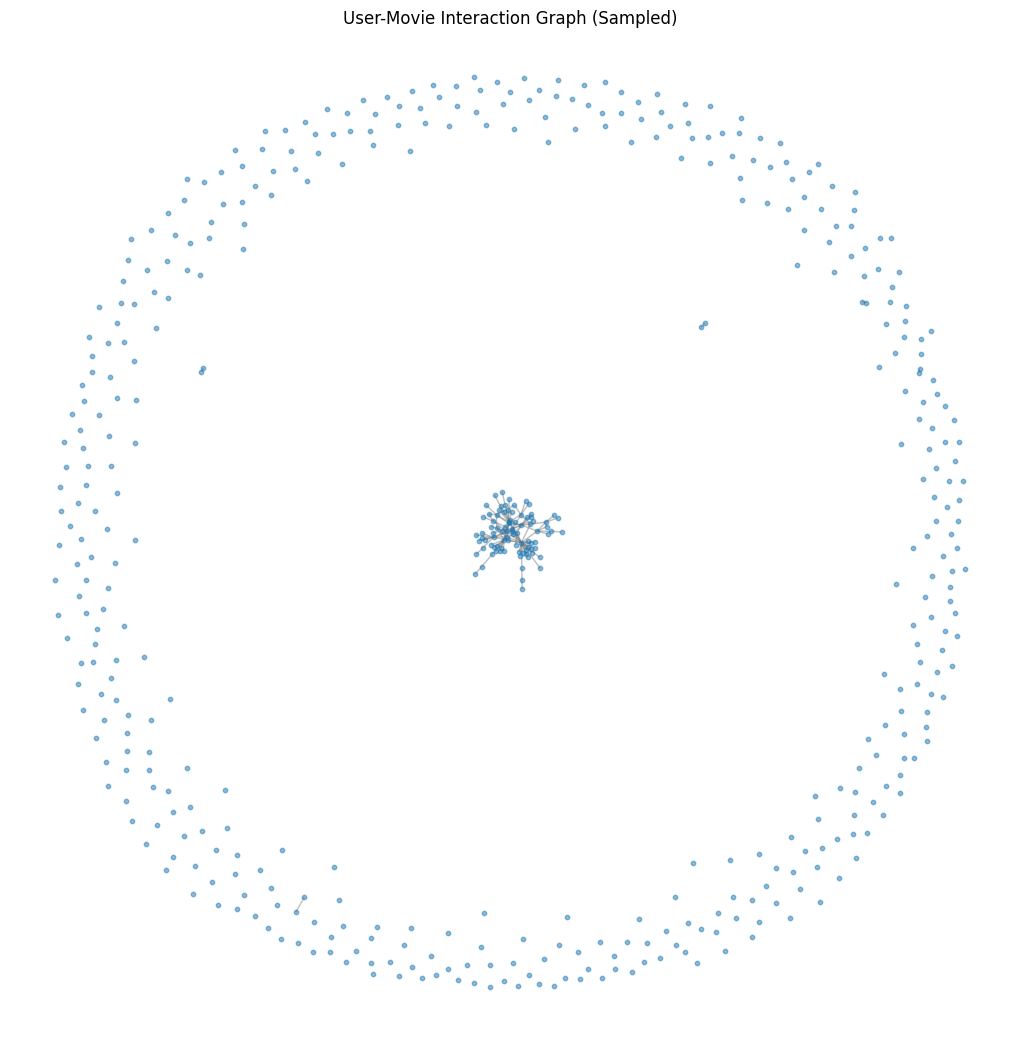

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import random

sample_nodes = random.sample(list(G.nodes), 500)
subG = G.subgraph(sample_nodes)

plt.figure(figsize=(10, 10))
nx.draw(subG, node_size=10, edge_color="gray", alpha=0.5)
plt.title("User-Movie Interaction Graph (Sampled)")
plt.show()
